In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# https://jakubmarian.com/how-to-understand-gdp-indicators/
# Difference between GDP indicators

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 10 columns):
GDP per capita (constant 2010 US$)                                     11358 non-null float64
GDP per capita (constant LCU)                                          9287 non-null float64
GDP per capita (current LCU)                                           9692 non-null float64
GDP per capita (current US$)                                           11828 non-null float64
GDP per capita growth (annual %)                                       11391 non-null float64
GDP per capita, PPP (constant 2011 international $)                    6459 non-null float64
GDP per capita, PPP (current international $)                          6462 non-null float64
Government expenditure per student, primary (% of GDP per capita)      1825 non-null float64
Government expenditure per student, secondary (% of GDP per capita)    1596 non-null float64
Government expenditure per student, tertiary (% of 

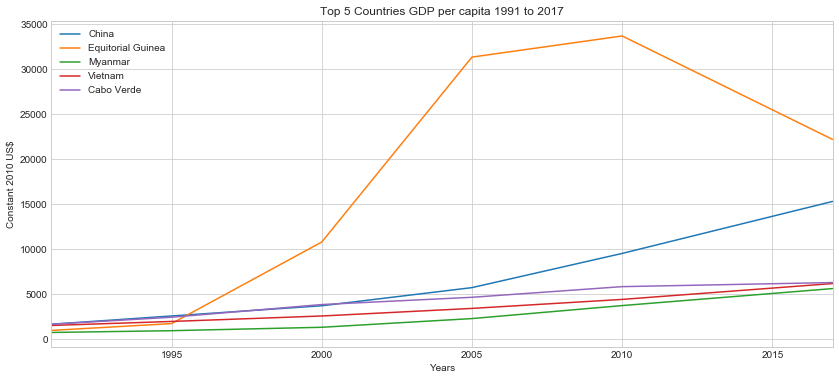

In [60]:
def calculateGDPPercentChange(row, initialYear, finalYear):
    return (((row[finalYear] - row[initialYear]) / row[initialYear]) * 100)

#Handle with PPP
gdp_columns_Int_current = pd.read_csv('GDPPerCapita_Current_US$')
gdp_columns_Int_current = gdp_columns_Int_current[(gdp_columns_Int_current['1991'].notnull()) &\
                                          (gdp_columns_Int_current['1995'].notnull()) &\
                                          (gdp_columns_Int_current['2000'].notnull()) &\
                                          (gdp_columns_Int_current['2005'].notnull()) &\
                                          (gdp_columns_Int_current['2010'].notnull())\
                                          & (gdp_columns_Int_current['2017'].notnull())]

gdp_columns_Int_current['gdpPercentChange'] = gdp_columns_Int_current.apply(lambda row: calculateGDPPercentChange(row, '1991', '2017'), axis=1)
gdp_columns_Int_current = gdp_columns_Int_current.sort_values(by=['gdpPercentChange'], ascending=False)
gdpPPP_1991_to_2017_change = gdp_columns_Int_current[['Country Name', 'gdpPercentChange']]

gdp_columns_Int_current.set_index("Country Name", inplace=True)
gdp_columns_Int_current.head(5)
gdp_columns_Int_current = gdp_columns_Int_current.loc[['Equatorial Guinea', 'China', 'Myanmar', 'Vietnam', 'Cabo Verde'], ['1991', '1995', '2000', '2005', '2010', '2017']]

gdp_columns_Int_current = gdp_columns_Int_current.loc[['Equatorial Guinea', 'China', 'Myanmar', 'Vietnam', 'Cabo Verde'], ['1991', '1995', '2000', '2005', '2010', '2017']]

equitorial_gdp = gdp_columns_Int_current.loc[['Equatorial Guinea']]
china_gdp = gdp_columns_Int_current.loc[['China']]
myanmar_gdp = gdp_columns_Int_current.loc[['Myanmar']]
vietnam_gdp = gdp_columns_Int_current.loc[['Vietnam']]
cabo_verde_gdp = gdp_columns_Int_current.loc[['Cabo Verde']]

data = {'Years':[1991, 1995, 2000, 2005, 2010, 2017], 'China': china_gdp.iloc[0],\
         'Equitorial Guinea':equitorial_gdp.iloc[0],\
         'Myanmar':myanmar_gdp.iloc[0],\
        'Vietnam':vietnam_gdp.iloc[0],\
         'Cabo Verde':cabo_verde_gdp.iloc[0]}

line_plot_df = pd.DataFrame(data)

ax = line_plot_df.plot.line(x='Years', figsize=(14, 6), title='Top 5 Countries GDP per capita 1991 to 2017')
ax.set_ylabel("Constant 2010 US$")

plt.savefig('gdp_line_graph.png')